Ben: A lot of unfamiliar packages here, more on the way. pipenv/virtual environments are your friend. A quick disclaimer that I am barely familiar with this domain of financial modeling, i can be very wrong in my understanding of things. i hope my code is readable.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

from pandas_datareader import data as pdr
import pandas_ta as ta #commented out for me for now, I (Ben) had some dependency issues
import yfinance as yf
# import quandl as qd # not used, ignor ples
from backtesting import Backtest, Strategy

In [149]:
yf.pdr_override() # for use with pandas-datareader, optional

# Data Sources/Exploration
## which stocks/tickers will we be looking at?
We've more or less arbitrarily settled on the current S&P 500 index, a popular choice.
## What data do we need, and where can we get it?
We need OHLC (open high low close) data, on a monthly and daily scale. Using yfinance, a module that basically scrapes the ya"hoo finance site for data on tickers, we can get most of what we need.
## 

In [150]:
ticker = pd.read_csv('ticker.csv')['Ticker']
tickers = ticker.to_list() # This is a list of all tickers in the SP500
tickers = [x.replace('.','-') for x in tickers] # yahoo has '-' instead of '.' for tickers, eg BRK.B
ticker.head()

0     AAPL
1     MSFT
2     AMZN
3       FB
4    GOOGL
Name: Ticker, dtype: object

In [151]:
# tickers

In [152]:
# sp_500 = {x:yf.Ticker(x) for x in tickers} # a dict of initialized yfinance tickers
# sp_500['AAPL'].history(start='2019-01-01', end='2020-12-31', interval='1mo')
# sp_500['AAPL'].history(start='2010-01-01', end='2020-12-31')

In [153]:
## below is how I got monthly and daily pandas dataframes of all stocks in one huge dict.  
monthly_sp500 = {}
# for tkr in tickers: # run all 500 at your own risk, it takes a while lol
for tkr in tickers[:10]:
    print('Grabbing ' + tkr + " data!")
    # monthly_sp500[tkr] = yf.Ticker(tkr).history(start='2010-01-01', end='2020-12-31', interval='1mo')
    monthly_sp500[tkr] = pdr.get_data_yahoo(tkr, start="2010-01-04", interval = "1mo")
    sleep(.1) # not planning on ddos-ing yahoo today
monthly_sp500['AAPL'] # take AAPL, for example; TODO deal with the pesky NaNs properly

Grabbing AAPL data!
[*********************100%***********************]  1 of 1 completed
Grabbing MSFT data!
[*********************100%***********************]  1 of 1 completed
Grabbing AMZN data!
[*********************100%***********************]  1 of 1 completed
Grabbing FB data!
[*********************100%***********************]  1 of 1 completed
Grabbing GOOGL data!
[*********************100%***********************]  1 of 1 completed
Grabbing GOOG data!
[*********************100%***********************]  1 of 1 completed
Grabbing TSLA data!
[*********************100%***********************]  1 of 1 completed
Grabbing BRK-B data!
[*********************100%***********************]  1 of 1 completed
Grabbing JPM data!
[*********************100%***********************]  1 of 1 completed
Grabbing JNJ data!
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-01,6.870357,7.327500,6.816071,7.307857,6.294721,1.077608e+10
2010-03-01,7.348214,8.481429,7.337500,8.392857,7.229299,1.215417e+10
2010-04-01,8.478929,9.730714,8.312500,9.324643,8.031907,1.236713e+10
2010-05-01,9.422857,9.567143,7.116071,9.174286,7.902396,1.808265e+10
2010-06-01,9.274643,9.964643,8.650000,8.983214,7.737815,1.665125e+10
...,...,...,...,...,...,...
2021-01-01,133.520004,145.089996,126.379997,131.960007,131.763107,2.240534e+09
2021-02-01,133.750000,137.880005,118.389999,121.260002,121.079071,1.833204e+09
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# monthly_sp500['AAPL'].loc[monthly_sp500['AAPL'].isna().any(axis=1)]

In [155]:
daily_sp500 = {}
# for tkr in tickers:
for tkr in tickers[:10]: #this only gets the first 10 fyi
    print('Grabbing ' + tkr + " data!")
    # daily_sp500[tkr] = yf.Ticker(tkr).history(start='2010-01-01', end='2020-12-31', interval='1mo')
    daily_sp500[tkr] = pdr.get_data_yahoo(tkr,start="2010-01-01")
    sleep(.1)
daily_sp500['AAPL'] # take AAPL, for example

Grabbing AAPL data!
[*********************100%***********************]  1 of 1 completed
Grabbing MSFT data!
[*********************100%***********************]  1 of 1 completed
Grabbing AMZN data!
[*********************100%***********************]  1 of 1 completed
Grabbing FB data!
[*********************100%***********************]  1 of 1 completed
Grabbing GOOGL data!
[*********************100%***********************]  1 of 1 completed
Grabbing GOOG data!
[*********************100%***********************]  1 of 1 completed
Grabbing TSLA data!
[*********************100%***********************]  1 of 1 completed
Grabbing BRK-B data!
[*********************100%***********************]  1 of 1 completed
Grabbing JPM data!
[*********************100%***********************]  1 of 1 completed
Grabbing JNJ data!
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.594968,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.490066,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.478067,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.521136,447610800
...,...,...,...,...,...,...
2021-02-26,122.589996,124.849998,121.199997,121.260002,121.260002,164320000
2021-03-01,123.750000,127.930000,122.790001,127.790001,127.790001,115998300
2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300


In [156]:
len(monthly_sp500['AAPL'].loc[monthly_sp500['AAPL'].isna().any(axis=1)])/len(monthly_sp500['AAPL']) * 100 #percentage of missingness

21.511627906976745

In [157]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors = 2)


# imputed_aapl = imputer.fit_transform(monthly_sp500['AAPL'].drop('Name', axis=1))
# imputed_aapl = pd.DataFrame(imputed_aapl,columns=['Open','High','Low','Close','Adj Close','Volume'])

In [158]:
# imputed_aapl = imputed_aapl.set_index(monthly_sp500['AAPL'].index)

In [159]:
# len(imputed_aapl.loc[imputed_aapl.isna().any(axis=1)])/len(imputed_aapl) * 100 #percentage of missingness

In [162]:
# everything in one stupid large dataframe
sp500m = monthly_sp500[tickers[0]] # monthly
sp500m['Name'] = tickers[0]

sp500d = daily_sp500[tickers[0]] # daily
sp500d['Name'] = tickers[0]

for tkr in tickers[1:10]:
# for tkr in tickers:
    df1 = monthly_sp500[tkr] # monthly
    df1['Name'] = tkr
    # df.set_index(['Name','Date'],inplace=True)
    sp500m = sp500m.append(df1)

    df2 = daily_sp500[tkr] # daily
    df2['Name'] = tkr
    # df.set_index(['Name','Date'],inplace=True)
    sp500d = sp500d.append(df2)
sp500m

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-02-01,6.870357,7.327500,6.816071,7.307857,6.294721,1.077608e+10,AAPL
2010-03-01,7.348214,8.481429,7.337500,8.392857,7.229299,1.215417e+10,AAPL
2010-04-01,8.478929,9.730714,8.312500,9.324643,8.031907,1.236713e+10,AAPL
2010-05-01,9.422857,9.567143,7.116071,9.174286,7.902396,1.808265e+10,AAPL
2010-06-01,9.274643,9.964643,8.650000,8.983214,7.737815,1.665125e+10,AAPL
...,...,...,...,...,...,...,...
2021-01-01,157.240005,173.649994,154.130005,163.130005,162.119080,1.844584e+08,JNJ
2021-02-01,165.309998,167.940002,157.970001,158.460007,157.478012,1.476050e+08,JNJ
2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,JNJ


In [163]:
sp500m

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-02-01,6.870357,7.327500,6.816071,7.307857,6.294721,1.077608e+10,AAPL
2010-03-01,7.348214,8.481429,7.337500,8.392857,7.229299,1.215417e+10,AAPL
2010-04-01,8.478929,9.730714,8.312500,9.324643,8.031907,1.236713e+10,AAPL
2010-05-01,9.422857,9.567143,7.116071,9.174286,7.902396,1.808265e+10,AAPL
2010-06-01,9.274643,9.964643,8.650000,8.983214,7.737815,1.665125e+10,AAPL
...,...,...,...,...,...,...,...
2021-01-01,157.240005,173.649994,154.130005,163.130005,162.119080,1.844584e+08,JNJ
2021-02-01,165.309998,167.940002,157.970001,158.460007,157.478012,1.476050e+08,JNJ
2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,JNJ


In [164]:
print(sp500m.shape,sp500d.shape)
sp500d

(1494, 7) (27389, 7)


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600,AAPL
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.594968,601904800,AAPL
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.490066,552160000,AAPL
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.478067,477131200,AAPL
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.521136,447610800,AAPL
...,...,...,...,...,...,...,...
2021-02-26,162.000000,162.410004,157.970001,158.460007,158.460007,14356800,JNJ
2021-03-01,161.449997,161.529999,159.089996,159.320007,159.320007,10539500,JNJ
2021-03-02,159.779999,160.779999,158.600006,159.020004,159.020004,7605800,JNJ


In [165]:
# sp500m.to_csv('SP500_monthly.csv')
# sp500d.to_csv('SP500_daily.csv')
# df = pd.read_csv('SP500_monthly.csv').infer_objects().set_index('Name').dropna()
df = pd.read_csv('SP500_monthly.csv').infer_objects().dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-02-01,63.259998,64.699997,61.889999,63.000000,45.095860,213341500.0,AAPL
2,2010-03-01,63.270000,65.489998,63.020000,65.199997,47.027702,249947500.0,AAPL
3,2010-04-01,65.370003,66.199997,64.209999,64.300003,46.378559,235860700.0,AAPL
4,2010-05-01,65.160004,65.620003,58.189999,58.299999,42.050858,357775800.0,AAPL
6,2010-06-01,58.209999,60.150002,57.549999,59.060001,42.988129,357343400.0,AAPL
...,...,...,...,...,...,...,...,...
90746,2020-11-01,138.979996,151.300003,137.490005,144.679993,142.791168,153635100.0,NWS
90748,2020-12-01,146.289993,157.660004,145.860001,157.380005,156.404709,158930200.0,NWS
90749,2021-01-01,157.240005,173.649994,154.130005,163.130005,162.119080,184458400.0,NWS
90750,2021-02-01,165.309998,167.940002,159.570007,162.759995,161.751358,133198000.0,NWS


In [166]:
st = pd.to_datetime(df.Date.min())
et = pd.to_datetime(df.Date.max())
j=1
k=2
# the 'midpoints' for each observe and hold period. midpoint in this context is where we switch from the observation period len=j to the holding period len=k
j_end = pd.date_range(st+pd.DateOffset(months=j*3), et, freq=str(k*3)+"MS")
j_end.strftime("%Y-%m-%d").to_list()

['2010-05-01',
 '2010-11-01',
 '2011-05-01',
 '2011-11-01',
 '2012-05-01',
 '2012-11-01',
 '2013-05-01',
 '2013-11-01',
 '2014-05-01',
 '2014-11-01',
 '2015-05-01',
 '2015-11-01',
 '2016-05-01',
 '2016-11-01',
 '2017-05-01',
 '2017-11-01',
 '2018-05-01',
 '2018-11-01',
 '2019-05-01',
 '2019-11-01',
 '2020-05-01',
 '2020-11-01']

In [167]:
#df of just the midpoint dates for sanity check
df[df['Date'].isin(j_end.strftime("%Y-%m-%d").to_list())]

,Date,Open,High,Low,Close,Adj Close,Volume,Name
4,2010-05-01,65.160004,65.620003,58.189999,58.299999,42.050858,357775800.0,AAPL
12,2010-11-01,63.880001,64.919998,61.250000,61.549999,45.223030,221392600.0,AAPL
20,2011-05-01,65.919998,67.370003,64.800003,67.290001,50.316845,270892200.0,AAPL
28,2011-11-01,63.680000,65.489998,61.049999,64.720001,49.249725,236914800.0,AAPL
36,2012-05-01,64.910004,65.489998,62.000000,62.430000,48.371529,278010100.0,AAPL
...,...,...,...,...,...,...,...,...
90714,2018-11-01,140.070007,148.750000,139.000000,146.899994,137.354538,152746600.0,NWS
90722,2019-05-01,140.949997,142.350006,128.520004,131.149994,124.227379,159034100.0,NWS
90730,2019-11-01,132.050003,138.630005,129.679993,137.490005,132.106400,127753600.0,NWS
90738,2020-05-01,149.619995,153.619995,143.009995,148.750000,144.833420,136208900.0,NWS


In [168]:
# based on the midpoint, get the start point for each observe and hold period
j_start = j_end + pd.DateOffset(months=-j*3)
j_start.strftime("%Y-%m-%d").to_list()

['2010-02-01',
 '2010-08-01',
 '2011-02-01',
 '2011-08-01',
 '2012-02-01',
 '2012-08-01',
 '2013-02-01',
 '2013-08-01',
 '2014-02-01',
 '2014-08-01',
 '2015-02-01',
 '2015-08-01',
 '2016-02-01',
 '2016-08-01',
 '2017-02-01',
 '2017-08-01',
 '2018-02-01',
 '2018-08-01',
 '2019-02-01',
 '2019-08-01',
 '2020-02-01',
 '2020-08-01']

In [169]:
# based on the midpoint, get the end point for each observe and hold period
k_end = j_end + pd.DateOffset(months=k*3)
k_end.strftime("%Y-%m-%d").to_list()

['2010-11-01',
 '2011-05-01',
 '2011-11-01',
 '2012-05-01',
 '2012-11-01',
 '2013-05-01',
 '2013-11-01',
 '2014-05-01',
 '2014-11-01',
 '2015-05-01',
 '2015-11-01',
 '2016-05-01',
 '2016-11-01',
 '2017-05-01',
 '2017-11-01',
 '2018-05-01',
 '2018-11-01',
 '2019-05-01',
 '2019-11-01',
 '2020-05-01',
 '2020-11-01',
 '2021-05-01']

In [170]:
timedf = pd.DataFrame({'j_start': j_start, 'midpoint': j_end, 'k_end': k_end}).infer_objects() # i put all this garbage in a handy function below
timedf

,j_start,midpoint,k_end
0,2010-02-01,2010-05-01,2010-11-01
1,2010-08-01,2010-11-01,2011-05-01
2,2011-02-01,2011-05-01,2011-11-01
3,2011-08-01,2011-11-01,2012-05-01
4,2012-02-01,2012-05-01,2012-11-01
5,2012-08-01,2012-11-01,2013-05-01
6,2013-02-01,2013-05-01,2013-11-01
7,2013-08-01,2013-11-01,2014-05-01
8,2014-02-01,2014-05-01,2014-11-01
9,2014-08-01,2014-11-01,2015-05-01


## ^^^let me know if this timedf time table is useful or not. I wanted an easy way to organize time. we can very easily switch it over to getting that midpoint value instead

In [171]:
def generate_timetable(j=1, k=2):
    '''aims to generate the MONTHLY table of times for each observe/hold period. The midpoint in this context is where we switch from the observation period len=j to the holding period len=k'''
    
    j_end = pd.date_range(st+pd.DateOffset(months=j*3), et, freq=str(k*3)+"MS") # the 'midpoints' for each observe and hold period. 
    j_start = j_end + pd.DateOffset(months=-j*3) # based on the midpoint, get the start point for each observe and hold period
    k_end = j_end + pd.DateOffset(months=k*3) # based on the midpoint, get the end point for each observe and hold period
    timetable = pd.DataFrame({'j_start': j_start, 'midpoint': j_end, 'k_end': k_end}).infer_objects()
    return timetable
timedf = generate_timetable()
timedf

,j_start,midpoint,k_end
0,2010-02-01,2010-05-01,2010-11-01
1,2010-08-01,2010-11-01,2011-05-01
2,2011-02-01,2011-05-01,2011-11-01
3,2011-08-01,2011-11-01,2012-05-01
4,2012-02-01,2012-05-01,2012-11-01
5,2012-08-01,2012-11-01,2013-05-01
6,2013-02-01,2013-05-01,2013-11-01
7,2013-08-01,2013-11-01,2014-05-01
8,2014-02-01,2014-05-01,2014-11-01
9,2014-08-01,2014-11-01,2015-05-01


In [172]:
df['Date']

0        2010-02-01
2        2010-03-01
3        2010-04-01
4        2010-05-01
6        2010-06-01
            ...    
90746    2020-11-01
90748    2020-12-01
90749    2021-01-01
90750    2021-02-01
90752    2021-02-26
Name: Date, Length: 67938, dtype: object

In [ ]:
midpoint = timedf.iloc[0].midpoint

In [175]:
def get_k_df(id=-1, midpoint=None):
    '''this should spit out a dataframe of data in the observational period k given specific id or midpoint value. 
    if unspecified it throws all of them at you with an extra identifying column "periods"'''
    print('input: ',id)
    if (id == -1): # not really sure why we need this but ill include it. this adds a sector column to the data for future filtering purposes if needed
        df_i = pd.DataFrame(columns=df.columns.to_list()+['period']) #dummy empty df
        for i in timedf.index: 
            # print(timedf.iloc[i].j_start,timedf.iloc[i].midpoint)
            df_ = df[(timedf.iloc[i].j_start <= pd.to_datetime(df['Date']))&(pd.to_datetime(df['Date']) <= timedf.iloc[i].midpoint)] # gets dates btw start and midpt
            df_['period'] = i
            df_i = pd.concat([df_i, df_])

        return df_i
    if (midpoint):
        print('haosdifhasdifkasdf') # TODO implement midpoint call; if variable is nonnull it should retrieve it if necessary
    return df[(timedf.iloc[id].j_start <= pd.to_datetime(df['Date']))&(pd.to_datetime(df['Date']) <= timedf.iloc[id].midpoint)] # gets dates btw start and midpt
get_k_df()

input:  -1


,Date,Open,High,Low,Close,Adj Close,Volume,Name,period
0,2010-02-01,63.259998,64.699997,61.889999,63.000000,45.095860,213341500.0,AAPL,0
2,2010-03-01,63.270000,65.489998,63.020000,65.199997,47.027702,249947500.0,AAPL,0
3,2010-04-01,65.370003,66.199997,64.209999,64.300003,46.378559,235860700.0,AAPL,0
4,2010-05-01,65.160004,65.620003,58.189999,58.299999,42.050858,357775800.0,AAPL,0
179,2010-02-01,63.259998,64.699997,61.889999,63.000000,45.095860,213341500.0,AAPL,0
...,...,...,...,...,...,...,...,...,...
90567,2020-11-01,138.979996,151.300003,137.490005,144.679993,142.791168,153635100.0,NWS,21
90742,2020-08-01,146.389999,154.399994,145.820007,153.410004,150.406158,109982700.0,NWS,21
90744,2020-09-01,153.869995,155.470001,142.960007,148.880005,146.936356,138801300.0,NWS,21
90745,2020-10-01,149.309998,153.139999,133.649994,137.110001,135.320007,137285300.0,NWS,21


In [ ]:
# left off here, was gonna combine j and k dataframes or something, brain tierd

In [174]:
print(get_k_df(0).Date.unique()) #sanity checking, hey it works
print(len(get_k_df(0).Name.unique())) #sanity checking, here i learned that we have 505 tickers

input:  0
['2010-02-01' '2010-03-01' '2010-04-01' '2010-05-01']
input:  0
505


In [147]:
len(tickers) # read above

505

In [ ]:
def get_j_df(id=-1):
    '''this should spit out a dataframe of data in the holding period k given specific id or midpoint value. 
    if unspecified it throws all of them at you with an extra identifying column "periods"'''
    print('input: ',id)
    if (id == -1): # we can decide if this is useful later this adds a sector column to the data for future filtering purposes if needed
        df_i = pd.DataFrame(columns=df.columns.to_list()+['period']) #dummy empty df
        for i in timedf.index: 
            # print(timedf.iloc[i].j_start,timedf.iloc[i].midpoint)
            df_ = df[(timedf.iloc[i].midpoint <= pd.to_datetime(df['Date']))&(pd.to_datetime(df['Date']) <= timedf.iloc[i].k_end)] # gets dates btw midpt and end
            df_['period'] = i
            df_i = pd.concat([df_i, df_])

        return df_i
    return df[(timedf.iloc[id].j_start <= pd.to_datetime(df['Date']))&(pd.to_datetime(df['Date']) <= timedf.iloc[id].midpoint)] # gets dates btw midpt and end
get_j_df()

In [ ]:
def create_portfolio(tickerlist):
    '''used to group tickers into respective momentum, reversal, etc groups'''
    return tickerlist # dummy

In [ ]:
# mapping j period, looking at the data at a certain j, cumulative product. worrying about positions since we have the times,
# we would have needed percentage of change and calculate cumulative product and have that lagged return, that lagged return, we had lagged return from j so what is a loser exactly.
# amir asks if the paper calcualtes the j lag return and then j = lag and then for that j, between the 500 we fidn the top n winners and n losers and then put them into respective groups
# check out link amir sent
# getting lagged values iteratively 
# we would just need to get j in this case so it would be over the period the trailing window size. we would have to worry about defining  what one step is.


# TODO questions I would like to ask: for k holding period, do we just want to get the last value as a label, or pull all the data ahead?
# how are we training, exactly? our current abstraction is kind of getting k and calculating their features at once... are we looking at patterns in the different groups?



## ----prototyping below----

In [56]:
aapl = imputed_aapl # take a look at apple again, this time with no nulls (dont know how to deal with them help)
aapl.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-01,6.870357,7.327500,6.816071,7.307857,6.294721,1.077608e+10
2010-03-01,7.348214,8.481429,7.337500,8.392857,7.229299,1.215417e+10
2010-04-01,8.478929,9.730714,8.312500,9.324643,8.031907,1.236713e+10
2010-05-01,9.422857,9.567143,7.116071,9.174286,7.902396,1.808265e+10
2010-06-01,9.274643,9.964643,8.650000,8.983214,7.737815,1.665125e+10
...,...,...,...,...,...,...
2020-12-01,121.010002,138.789993,120.010002,132.690002,132.492020,2.322957e+09
2021-01-01,133.520004,145.089996,126.379997,131.960007,131.763107,2.240534e+09
2021-02-01,133.750000,137.880005,118.389999,121.260002,121.079071,1.830518e+09


In [230]:
from sklearn.impute import KNNImputer

def effect(x):
    if( x < 0.0 ):
        return "Reversal"
    elif(x > 0.0):
        return "Momentum"
    else:
        return "None"
    


## shamelessly stolen code, still trying to comprehend what wizardry is going on in here
dfs = []
k = 4
imputer = KNNImputer(n_neighbors = 2)
for ticker in tickers[:10]:
    print('Grabbing ' + ticker + " data!")
    curr_df = pdr.get_data_yahoo(ticker, start="2009-12-01", interval = "1mo")
    if(curr_df.empty):
        print('Failed to get ' + ticker + ' stock data!')
        continue
    
    #imputed_df = imputer.fit_transform(curr_df)
    #imputed_df = pd.DataFrame(imputed_df,columns=['Open','High','Low','Close','Adj Close','Volume'])
    #imputed_df = imputed_df.set_index(curr_df.index)
    
    
    curr_df = curr_df.dropna()
    #imputed_df['Name'] = ticker
    curr_df['Name'] = ticker
    curr_df = imputed_df
    print(curr_df.isna().sum())
    curr_df = curr_df.reset_index()
    curr_df.set_index(['Name','Date'],inplace=True)
    curr_df = curr_df[~curr_df.index.duplicated(keep='first')]
    obs_df = (curr_df.reset_index(level=[0])
              ['Adj Close'].resample(str(k) + 'M').first().ffill().pct_change()[1:]).to_frame()
    obs_df.rename(columns={'Adj Close':'Adj Close %Change'},inplace=True)
    obs_df['Name'] = ticker
    obs_df = obs_df.reset_index()
    obs_df.set_index(['Name','Date'],inplace=True)
    obs_df['Cum Returns'] = (obs_df['Adj Close %Change'] + 1).groupby('Name').cumprod()
    obs_df['Effect'] = obs_df['Adj Close %Change'].apply(effect)
    dfs.append(obs_df)
    curr_df = None
    obs_df = None

Grabbing AAPL data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64
Grabbing MSFT data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Grabbing AMZN data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64
Grabbing FB data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64
Grabbing GOOGL data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64
Grabbing GOOG data!
[*********************100%***********************]  1 of 1 completed


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64
Grabbing TSLA data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64
Grabbing BRK-B data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Grabbing JPM data!
[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64
Grabbing JNJ data!


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


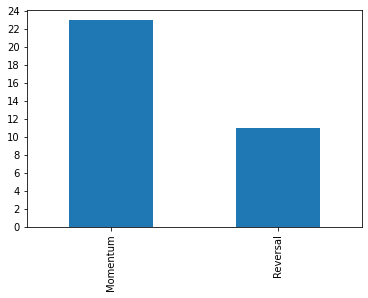

In [231]:
dfs[8]['Effect'].value_counts().plot(kind='bar',yticks=range(0,25,2))

In [232]:
new_df = pd.merge_asof(dfs[0],aapl,on='Date')
new_df['Name'] = 'AAPL'
new_df.set_index(['Name','Date'],inplace=True)
new_df = new_df[~new_df.index.duplicated(keep='first')]
new_df

Adj Close %Change  Cum Returns    Effect        Open  \
Name Date                                                               
AAPL 2010-04-30          -0.024065     0.975935  Reversal    8.478929   
     2010-08-31          -0.065446     0.912065  Reversal    9.301429   
     2010-12-31           0.082600     0.987401  Momentum   11.259643   
     2011-04-30          -0.027044     0.960698  Reversal   12.539643   
     2011-08-31           0.135997     1.091350  Momentum   14.206429   
     2011-12-31          -0.036785     1.051205  Reversal   13.662143   
     2012-04-30           0.044460     1.097942  Momentum   21.493929   
     2012-08-31          -0.044433     1.049157  Reversal   35.666607   
     2012-12-31           0.124670     1.179955  Momentum   21.201786   
     2013-04-30           0.082189     1.276935  Momentum   15.782143   
     2013-08-31           0.147908     1.465804  Momentum   35.666607   
     2013-12-31           0.045376     1.532316  Momentum   19.928572   
     2014-04-30           0.027658     1.574696  Momentum   19.205713   
     2014-08-31           0.155082     1.818902  Momentum   35.666607   
     2014-12-31           0.065039     1.937202  Momentum   29.702499   
     2015-04-30          -0.054394     1.831830  Reversal   31.205000   
     2015-08-31           0.007000     1.844654  Momentum   35.666607   
     2015-12-31          -0.053824     1.745366  Reversal   29.687500   
     2016-04-30           0.127048     1.967111  Momentum   27.195000   
     2016-08-31           0.086812     2.137880  Momentum   35.666607   
     2016-12-31           0.062802     2.272143  Momentum   27.592501   
     2017-04-30          -0.034686     2.193332  Reversal   35.927502   
     2017-08-31           0.139944     2.500275  Momentum   35.666607   
     2017-12-31           0.026937     2.567625  Momentum   42.487499   
     2018-04-30           0.069428     2.745888  Momentum   41.660000   
     2018-08-31          -0.128837     2.392115  Reversal   35.666607   
     2018-12-31           0.171396     2.802114  Momentum   46.115002   
     2019-04-30          -0.030705     2.716075  Reversal   47.910000   
     2019-08-31          -0.007967     2.694437  Reversal   35.666607   
     2019-12-31           0.000697     2.696315  Momentum   66.817497   
     2020-04-30           0.158613     3.123986  Momentum   61.625000   
     2020-08-31           0.005566     3.141373  Momentum   35.666607   
     2020-12-31           0.014520     3.186985  Momentum  121.010002   
     2021-04-30           0.103329     3.516292  Momentum  122.589996   

                       High         Low       Close   Adj Close        Volume  
Name Date                                                                      
AAPL 2010-04-30    9.730714    8.312500    9.324643    8.031907  1.236713e+10  
     2010-08-31    9.438571    8.412857    8.682143    7.478480  9.589121e+09  
     2010-12-31   11.666429   11.246071   11.520000    9.922909  6.973235e+09  
     2011-04-30   12.683214   11.434286   12.504643   10.771044  9.253829e+09  
     2011-08-31   14.267857   12.607857   13.743929   11.838518  1.614260e+10  
     2011-12-31   14.610357   13.488571   14.464286   12.459009  6.306532e+09  
     2012-04-30   23.000000   19.821428   20.856428   17.964962  1.559899e+10  
     2012-08-31   38.327353   33.587836   36.323057   34.606373  5.841127e+09  
     2012-12-31   21.235357   17.901072   19.006071   16.516520  1.213275e+10  
     2013-04-30   15.901786   13.753571   15.813571   13.822287  1.096349e+10  
     2013-08-31   38.327353   33.587836   36.323057   34.606373  5.841127e+09  
     2013-12-31   20.540714   19.242857   20.036428   17.849323  7.057397e+09  
     2014-04-30   21.408215   18.261786   21.074642   18.886589  6.435061e+09  
     2014-08-31   38.327353   33.587836   36.323057   34.606373  5.841127e+09  
     2014-12-31   29.812500   26.565001   27.594999   25.100164  4.294378e+09  
     2015-04-30   33.634998 

In [1]:
import pandas_ta as ta
new_df.ta.cores = 7
new_df.ta.sma(length=8, append=True)
new_df.ta.rsi(append=True)
new_df.ta.cci(length=8, append=True)
new_df['return std'] = new_df['Cum Returns'].rolling(2).std()
new_df.ta.willr(length=k/2, append=True)
new_df.ta.roc(length=k/2,append=True)
new_df.ta.ema(append=True)
new_df.ta.pdist(append=True)
new_df.ta.variance(length=4,append=True)
new_df.ta.psar(append=True)
new_df = new_df.join(pd.get_dummies(new_df.Effect, prefix='Effect')) #one hot
new_df

NameError: name 'new_df' is not defined

In [ ]:
import seaborn as sns

corr = new_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="PuBuGn", vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
new_df

In [ ]:
# def K_ranking(ticker_df):
def K_ranking(start_time, end_time):
    '''given a time range, this reads in OHLC data of the s&p500 and converts it into usable features.'''
    

# Modeling:
Below we start to really look at feature engineering, not much here yet

In [ ]:
# pd.read_csv('constituent_performance_4_months.csv')

In [ ]:
# momentum/ model: given a huge dataset with daily/monthly data, we determine in an initial period J to find which tickers do the best/worst, 

## ---notes below---

# For the momentum analysis portion:
The way we plan to proceed for now is to give each stock in our index (sp500) equal weights, in a sense, then rank them by some criteria on how well they are performing. we will adopt the observe J and hold K strategy as detailed in the paper, in which there is an observatory period of J quarters/months/days and a holding period of K quarters/months/days (Ben: idk, j might be able to overlap with k, we can do a lot with how we implement it). In short, we classify in the J period whether a particular ticker would be best treated with a momentum or reversal strategy, or some other. The classification task here is thus presented.

momentum strategy: buy/give heavier weights over time to well performing stocks, as we assume they will continue to get better as per our understanding of momentum

reversal strategy: Amir proposed we short underperforming stocks. This strategy we adopt *might* actually be different from what the paper is proposing, which is to buy and hold underperforming stocks as we predict it to rebound (Ben: fact check me pls).

stocks in between: dont buy them, or leave them as they are...? feel free to share your own thoughts.

# For the modeling portion: 
a lot still left untouched, ill think a bit harder about it tmr ...
we want 3 models to do this kind of momentum analysis algorithmically vs manually, and pit it against a baseline of a simple buy and hold strategy. The parameters will come from a wealth of technical analysis (read: all the fancy hard to understand financial forecasting stuff) libraries already available (we probably wont be making most of them, beyond the simple stuff) but we do have a deadline to keep in mind.

momentum groups have positive trensds, high return rates, 

reversal groups are stocks taht are losing. 
dynamically managing the 500 tickers in s&p.

hwo do we predict who is going into momentum group at t+k, and how accurate can we be?
based on the pricing trends, who will be in reversal and who will be in momentum?
    a lot of room to work with
bactesting takes our predictions and our model trained to figure out how to weight the positions of the stocks, we would take that strategy and test it on historical data

we would have a lot to talk about in terms of a paper, how to improve, what not to notice
how it could be used in the real world market

do we want to create our own feature on which ticker is profitable, or 
- returns? predicting reurns over a certain period\\
- the momentum to reversal ratio for a particular 
- more categorical features interpreted from indicators
if we could answer these questions, how to implement above
predictions on who goes where, then we can find out which features can increase accuracy over time, then weights, risk parameter, where the algo tries to place the stocks momentum and reversal groups and then it meets the parameter that we feed
how do I predict, say, can we predict the possible return and then see, based on that,..
there are certain indicators 
moving averages, where they change is a trend reversal indicate where and when that happens
if we need more features

waht would be a good starting point for us to start on?
- creating features? familiarizing ourselgves with this notebook
- we bought here and held there\
- maybe correlation analysis? taking old data and shiftiing it around to create and make it as accurate as possible for one of those and then figuring out which one of these affect accuracy of who goes in what group.
tldr the sooner we play with the features bnetter 
who is in momentum who is in reversal based on certain criteria?
for momentum and reversal, we are predicting return, get rmse beneath 80, and then visualize how it places and then prefirmance. start iterating on that part. cumulative returns vs actual returns
creating better features?
tuning parameters to modify the suggestion you would give based on momentum group.
no effect is that it dont make it int
we have many variables to compare the two. lower profiitability and higher rate. if it kept your risk constrained and you still had a significant strategy



analyze at j, hold for k. 
evaluating when it hits the lowest...?




so we have stocks, are we predicting profitability? -its not a difficult question to ask. we are predicting 

shweta as a clasirifation problem, momentum nad reversal. 
if we went back to momentum and reversal?
- with these, can we predict return? pick a momentum or reversal group 
we label with momentum and reversal. say we have a collection, and a group at certain points. predict return? if you were to hold them for a time. use calculations for holding, having a certain period  and hold? for a certain amount. eg 2010 to 2015, we have all the return data, take the 

could we create a concrete quesiton
xgd regressor
> check out the moethodology portion